<h2 align="center"> Univariate Linear Regression </h2>

###  Load the Data and Libraries
---

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
data = pd.read_csv("bike_sharing_data.txt")
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000s vs Population in 10000s')

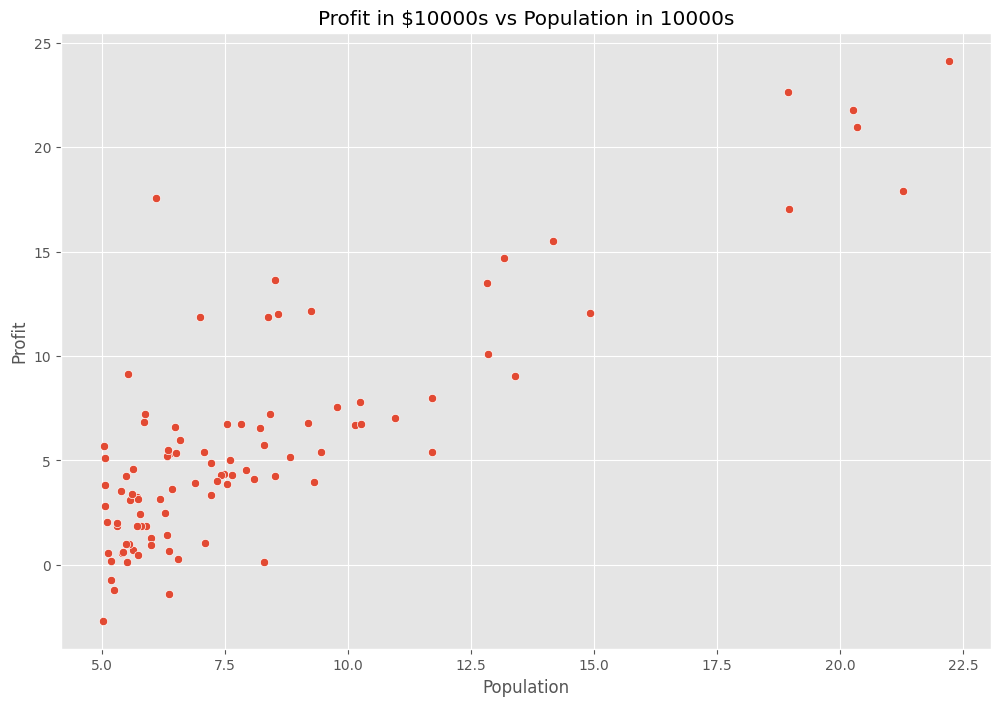

In [ ]:
ax = sns.scatterplot(x="Population",y = "Profit",data=data)
ax.set_title("Profit in $10000s vs Population in 10000s")

### Compute the Cost $J(\theta)$
---

In [ ]:
def cost_function(x,y,theta):
    m=len(y)
    y_predict =x.dot(theta)
    error = (y-y_predict)**2
    return 1/(2*m)*np.sum(error)

In [ ]:
m= data.Population.values.size
X= np.append(np.ones((m,1)), data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta=np.zeros((2,1))
cost_function(X,y,theta)

32.072733877455676


 Gradient Descent
---

In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    costs= []
    for i in range(iterations):
        y_pred =  X.dot(theta)
        error=np.dot(X.transpose(),(y_pred-y))
        theta-=alpha*1/m*error
        costs.append(cost_function(X,y,theta))
    return theta, costs

In [ ]:
theta,costs= gradient_descent(X,y,theta,alpha=0.01,iterations=2000)
print("h(x)={}+{}x1".format(str(round(theta[0,0],2)),
                            str(round(theta[1,0],2))))
print(costs)

h(x)=-3.79+1.18x1
[6.737190464870006, 5.9315935686049555, 5.901154707081388, 5.895228586444221, 5.8900949431173295, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806385, 5.86482686531293, 5.859827889932181, 5.85484692057229, 5.849883892376585, 5.844938740722034, 5.840011401218361, 5.835101809707226, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.7964563822269, 5.7917036733806535, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434047, 5.754293134309077, 5.749692295048628, 5.745108027745684, 5.740540272709012, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.7001637861238565, 5.695757917651815, 5.691367918863751, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401505, 5.6696539767


Visualising the Cost Function $J(\theta)$
---

In [ ]:
from  mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0=np.linspace(-10,10,100)
theta_1 = np.linspace(1,4,100)
cost_values =np.zeros((len(theta_0),len(theta_1)))
for i in range (len(theta_0)):
    for j in  range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j] =  cost_function(X,y,t)

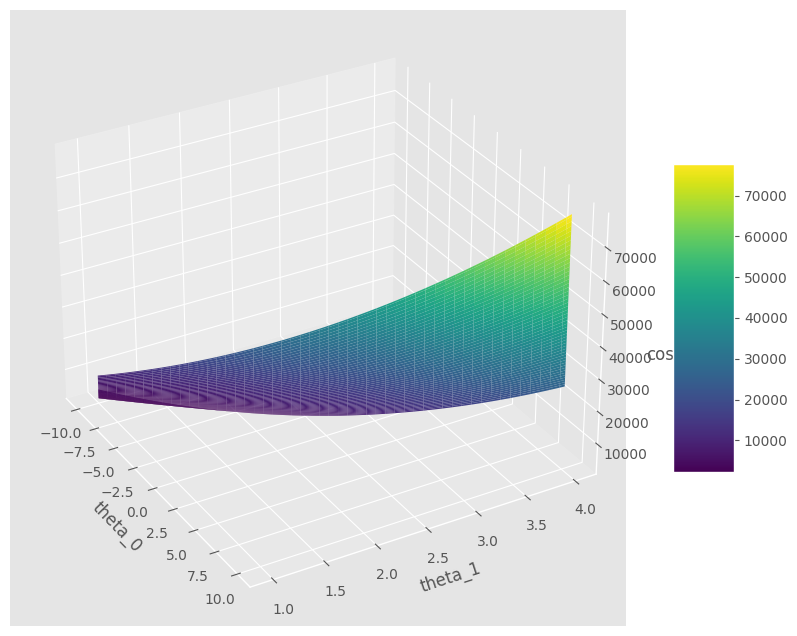

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(projection='3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.xlabel("theta_0")
plt.ylabel("theta_1")
ax.set_zlabel("cost")
ax.view_init(30,330)
plt.show()

##  Plotting the Convergence
---

Text(0.5, 1.0, 'Values of the cost function against number of iterations')

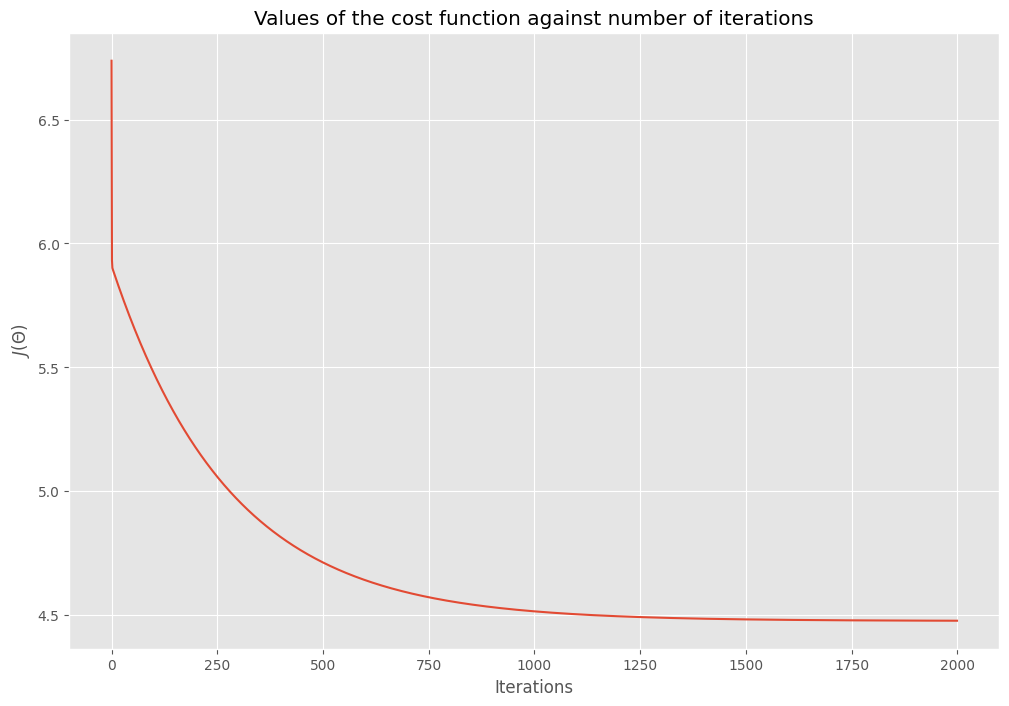

In [ ]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the cost function against number of iterations')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Fitting the line
---

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.78806857],
       [ 1.18221277]])

[-3.78806857  1.18221277]


<Axes: xlabel='Population', ylabel='Profit'>

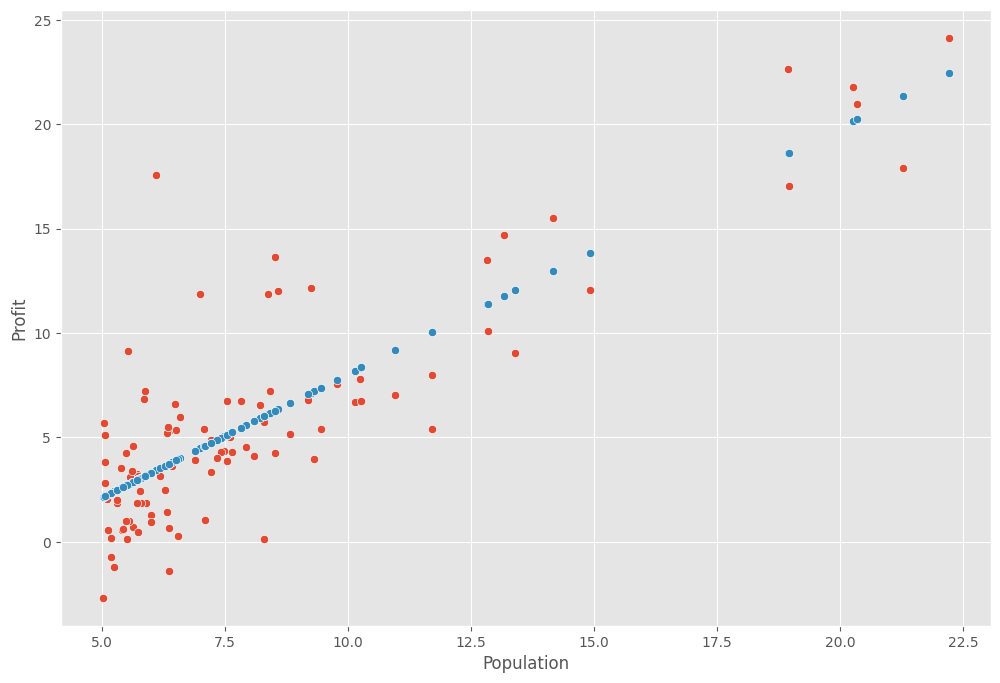

In [ ]:
theta=np.squeeze(theta)
print(theta)
sns.scatterplot(x="Population",y="Profit",data=data)
#print(data)

my_x = []
for i in X:
    my_x.append(i[1])

my_y=[]
for  t in X:
  my_y.append(np.dot(theta,t))


sns.scatterplot(x=my_x,y=my_y)



Predict function
---

In [ ]:
def predict(x):
   x= np.array([[1], [x]])
   prediction = np.dot(theta,x)
   return prediction


In [ ]:
predict(45)

array([49.41150629])